<center><h1> Clarence Barron Spring 2023 Final Project</h1></center>

#### First we have to import the libraries we have to use in order to conduct this analysis.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### The file will imported into our program for analyzing, and we can verify this by using the .head() function to check.

In [19]:
isp = pd.read_csv(r'C:\Users\c3myb\OneDrive\Documents\Juypter Notebook HW Files\CPE 4040\Final Project\telco_churn.csv')
isp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### We can use describe to look at our data further. It does not display all the data unfortunatelly, but it is enough to verify.

In [20]:
isp.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### We can use info to see what data types our data is in. Everything here seems fine outside of TotalCharges, which needs to be a numeric type, so we will need to check and clean the data.

In [21]:
isp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Section 1: Data Cleaning and Preprocessing:

#### Before we change the data type, we must check to see if there are any null values within the data set. As we can see, there are no null types, so we can keep going, but in case if the program does not pick up any values, we can replace blanks with NaN numbers.

In [22]:
missingCheck = isp.isnull().sum()
print(missingCheck)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### After looking through, we can make sure there are no nulls to double check replacing every blank number with NaNs.

In [23]:
isp['TotalCharges'] = isp['TotalCharges'].replace(' ', np.nan)
isp['TotalCharges'] = isp['TotalCharges'].astype(float)
isp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Then upon using .isna() we can see how many NaN numbers are in place in the data set. As it can be seen here, there were 11 NaNs detected, so we can clean them up.

In [24]:
nancheck = isp.isna().sum()
print(nancheck)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


#### By using the mean, we can replace the NaNs with the mean of the total charges to keep our data consistent. After replacing, we can use the same nancheck value we make have replaced the values. Afterward, we have now finished cleaning our TotalCharges column.

In [25]:
meanCharges = isp['TotalCharges'].mean()
isp['TotalCharges'] = isp['TotalCharges'].replace(np.nan, meanCharges)

In [26]:
nancheck = isp.isna().sum()
print(nancheck)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### We droped the customerID column, because it has no real relavence when it comes to analyzing the data.

In [27]:
isp = isp.drop(columns=["customerID"])

In [28]:
isp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Section 2: Exploring the Telecom Data:

#### First, we are going to analyze Monthly Charges vs Customer Churn. We are first going to use Describe to see every quartile. This will be used to help us anaylyze further to see how much Monthly Cost will affect the Churn.

In [29]:
isp['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

#### With the use of the box plot, we can verify that this column has no outliers that needs to be handled prior.

<AxesSubplot:>

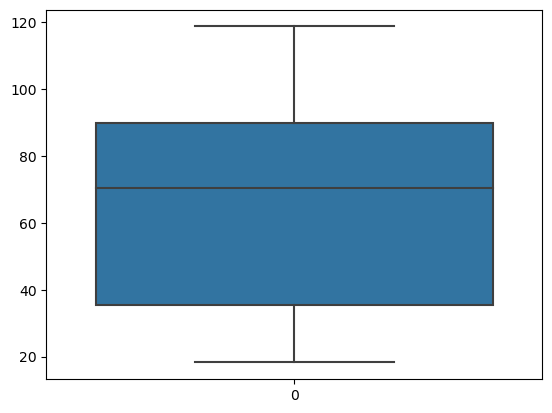

In [30]:
sns.boxplot(isp['MonthlyCharges'])

#### After analyzing and serperating the columns into the 4 quartiles (min, 25%, 50%, 75%, and max), the grouped by chart will show the amount of customers that are in each quartile based on payment range. The legend is structured using the describe function earlier for each quartile to display a range.

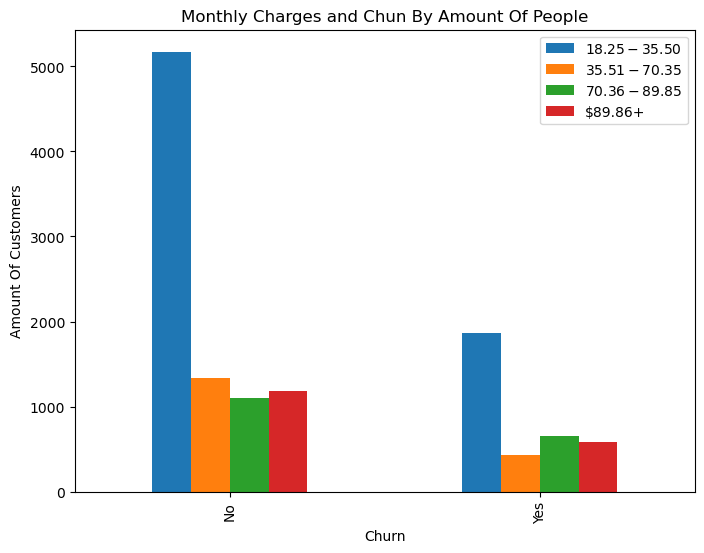

In [31]:
#Monthly Charge vs Chrun
monthInfo = isp['MonthlyCharges']
q1ChurnMonth = isp[((monthInfo > monthInfo.min()) & monthInfo <= monthInfo.quantile(0.25))].groupby(['Churn']).count()['MonthlyCharges']
q2ChurnMonth = isp[(monthInfo > monthInfo.quantile(0.25)) & (monthInfo <= monthInfo.quantile(0.50))].groupby(['Churn']).count()['MonthlyCharges']
q3ChurnMonth = isp[(monthInfo > monthInfo.quantile(0.50)) & (monthInfo <= monthInfo.quantile(0.75))].groupby(['Churn']).count()['MonthlyCharges']
q4ChurnMonth = isp[(monthInfo > monthInfo.quantile(0.75)) & (monthInfo <= monthInfo.max())].groupby(['Churn']).count()['MonthlyCharges']


charting = pd.concat([q1ChurnMonth, q2ChurnMonth, q3ChurnMonth, q4ChurnMonth], axis=1)
charting.columns = ['$18.25 - $35.50', '$35.51 - $70.35', '$70.36 - $89.85', '$89.86+']

charting.plot.bar(figsize=(8, 6))
plt.xlabel('Churn')
plt.ylabel('Amount Of Customers')
plt.title('Monthly Charges and Chun By Amount Of People')
plt.legend()
plt.show()

We can see here that, a lot of people who do not play a lot will not churn. However, if we look at the yes part of the graph, we can see that about 2000 customers will churn. This is more than likely that they cannot either afford it, or the customer has made the decision to drop the service. While the higher values have a lower population, the amount of customers that will churn shows the same correlation. 

This also shows how significant the monthly fee can affect the amount of customers that will churn as well.

#### Considering what we did in the first graph, it will only make sense to see the contracts that the people who do and do not churn sign up for the most. By grouping up the contract and churning, we can count each value to get how many customers are on both charts. Also, a side-by-side comparison can be made as well.

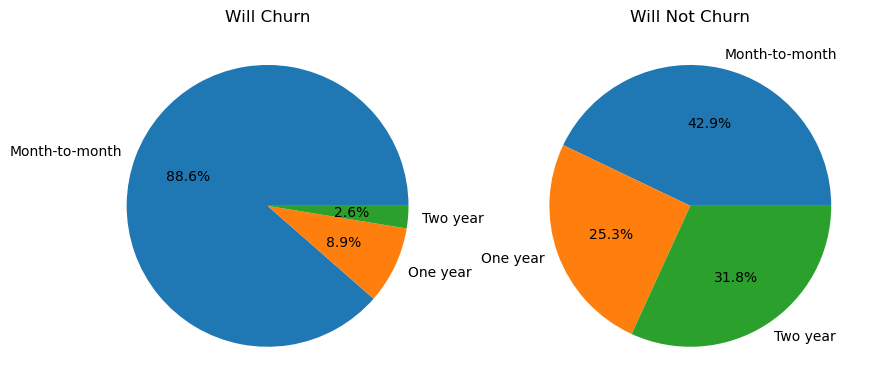

In [32]:
#Contract Duration vs Churn
contractChurn = isp.groupby(['Contract', 'Churn'])['Churn'].count().unstack()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
contractChurn['Yes'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_ylabel('')
ax1.set_title('Will Churn')

contractChurn['No'].plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Will Not Churn')
ax2.set_ylabel('')
plt.show()

After grouping up the contract and Churn, we can see that around 88.6% of customers on the month-to-month will more than likely churn. This shows that they are not very sold on signing for one or two year contracts and are less committed into staying with the company. Also, this can correlate with the last graph with the monthly costs as well to, as the pie graphs show that majoirty of those within the 18-35 dollar range that churn are also on the month to month plan.

Seeing the second pie chart, this also shows that majority of the people who will not churn also sign contracts for a year and even two years. With this fact, we can see that month to month is still the majority of those who do not churn, but those who do not churn also sign on for contracts.

#### Online security is very important and using the same line of logic, we can group the people who has online security and churning to see the correlation between online security and churning.

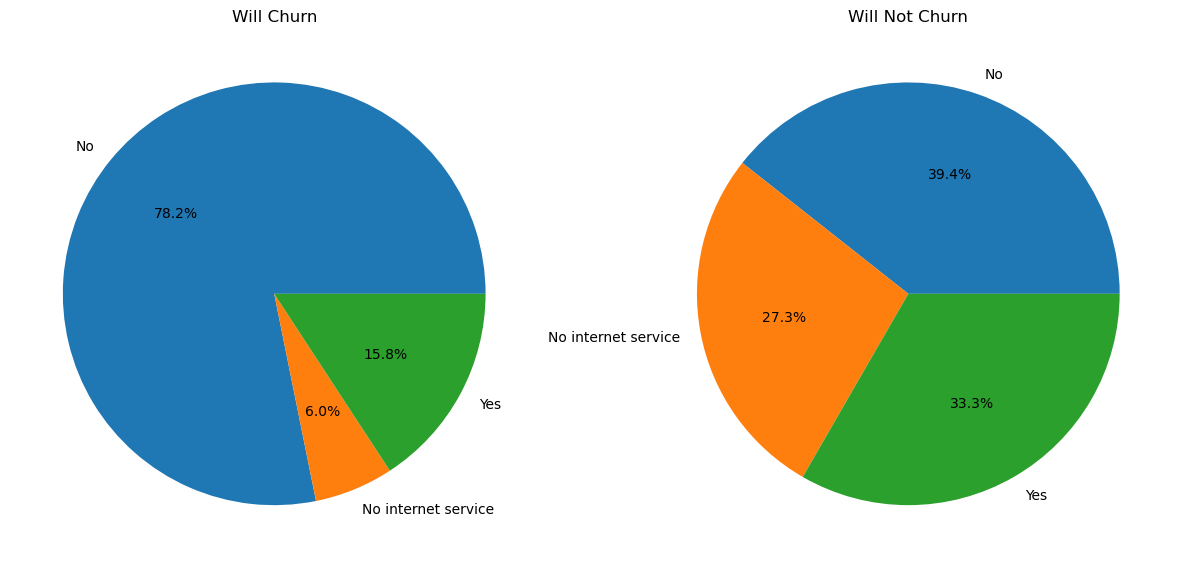

In [33]:
#Online Security vs Chrun
securityChurn = isp.groupby(['OnlineSecurity', 'Churn'])['Churn'].count().unstack()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 9))
securityChurn['Yes'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_ylabel('')
ax1.set_title('Will Churn')

securityChurn['No'].plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Will Not Churn')
ax2.set_ylabel('')
plt.show()

Given Online Security is a major thing now a days, a lot of people will make sure that their internet is secure enough. However, seeing that majority of the people will churn due to having no internet security, it shows that the company needs to invest into more online security or have more protections for customers. If a data breach were to happen and something drastic was taken, then this can have rammifications on the company with trust. However, those who does not churn, shows they have their internet secure. This data shows that it is more than likely a feature that the company offers seperately, but if majority of the people churning do not have online security with a whomping 78.2% must show that it is out of people's price range. This can also correspond to the bar graph with Monthly Cost to further justify the analysis there. 

#### Taking the idea from the first group by bar chart, we can make ranges with the tenure and seperate them into three columns to then chart. 1-12 and 13-24 shows the one and two year contract plans, and 24+ shows how long people have been with the company. When the contracts run out, churning is fair game at that point, which is why 24+ is in its own column.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

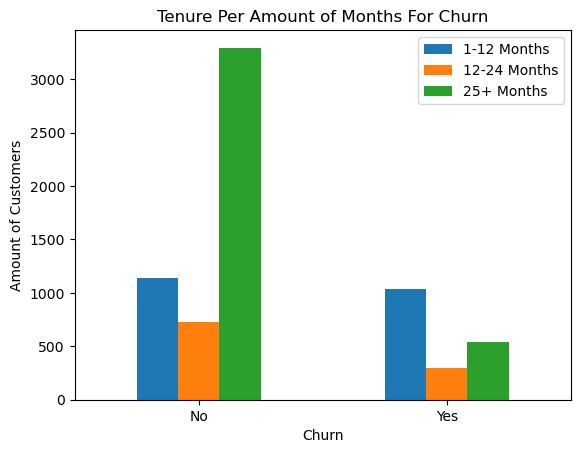

In [34]:
#Tenure vs Churn
tenure1to12 = isp[(isp['tenure'] >= 1) & (isp['tenure'] <= 12)].groupby('Churn')['Churn'].count()
tenure13to24 = isp[(isp['tenure'] >= 13) & (isp['tenure'] <= 24)].groupby('Churn')['Churn'].count()
tenure25plus = isp[(isp['tenure'] >= 25)].groupby('Churn')['Churn'].count()

tenureChurn = pd.concat([tenure1to12, tenure13to24, tenure25plus], axis=1)
tenureChurn.columns = ['1-12 Months', '12-24 Months', '25+ Months']

tenureChurn.plot(kind='bar')
plt.ylabel('Amount of Customers')
plt.title("Tenure Per Amount of Months For Churn")
plt.xticks(rotation=0)

After making the bar graph, we can look at the tenure (amount of months a customer stays), and it shows that people who have stayed with the company shows that the bigger tenure a customer has, the less they will want to churn. This is a positive aspect as having over 3000 customers with a high tenure show that over a long term the company is very reliable. However, we can see when a customer stays for 1 month to a year, they are more than likely to churn as both "Yes" and "No" are very similar in population sitting around 1000. However, given this analysis, this shows that the amount of tenure does not affect the amount of churning the company has seen.

#### Just like the other pie charts, we can use the group by function and organize the charts using sub plots. This time, we can use the colors Red and Blue so we can visualize the pie chart. 

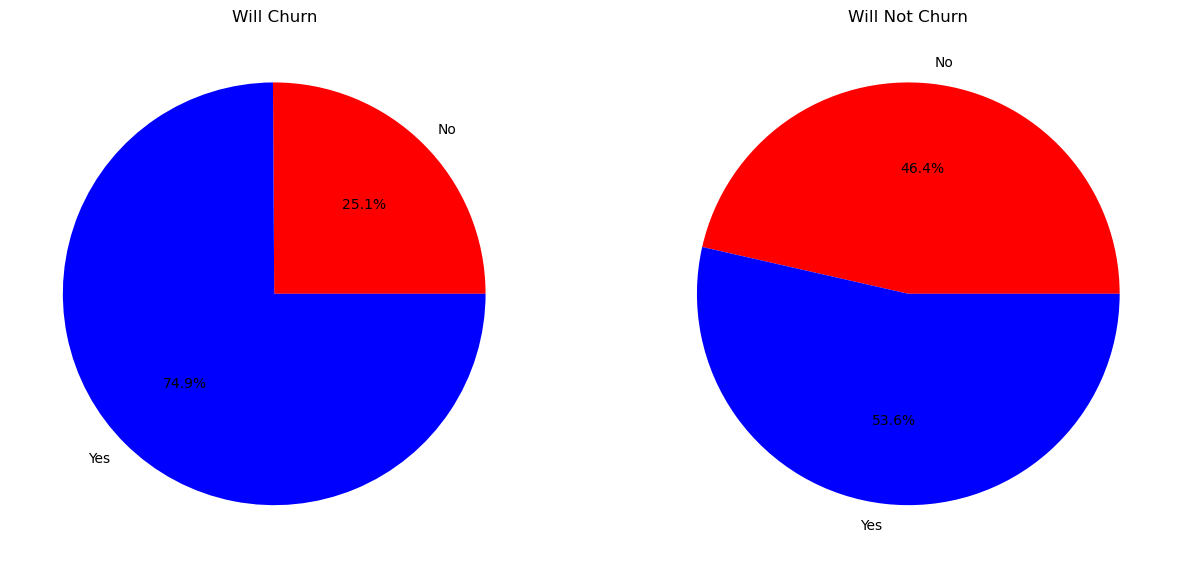

In [35]:
#Paperless Billing vs Churn
paperlessChurn = isp.groupby(['PaperlessBilling', 'Churn'])['Churn'].count().unstack()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 9))

colors = ['Red', 'Blue'] 

paperlessChurn['Yes'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=colors)
ax1.set_ylabel('')
ax1.set_title('Will Churn')

paperlessChurn['No'].plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=colors)
ax2.set_title('Will Not Churn')
ax2.set_ylabel('')
plt.show()

Regarding Paperless billing, we can see that majority of customers who do paperless billing will churn. Most people will do their payment automatically through the company website. However, this will also give them more of an opportunity to cancel their subscription if they must. The graph shows that about 3 out of 4 people that signed up for the service will not renew or cancel, which is a huge amount but going back to the intial Monthly Charges, if the charges have been going up or something in the economy has happened, this can show that most people would just churn.

### Question: Based on the analysis, can you identify some of the more relevant attributes for detecting churn?

For more attirbutes to detect churn, we can use the Total Amount of Charges as overtime the customer might not be able to afford the service at a certain point. Another one we can use is the amount of lines the customer needs. If the customer needs multiple lines, which are prevalent in big households, then it can be a deal breaker for the customer as well too. One last attribute that can be used for detecting the churn is payment method. If the payment method is archaic, then overtime the customer may not want to renew if the company does not support or if they move to another location further away from where they make the payment.

## Section 3: Predictive Modeling

### Section 3.1 Creating Features and Fixing Data For Model

### Section 3.1.1 Converting Categorical Features

#### We convert the churn column to the to 1 and 0, and we can verify that using the .head() function.

In [36]:
isp['Churn'] = isp['Churn'].replace('Yes', 1)
isp['Churn'] = isp['Churn'].replace('No', 0)
isp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### We will use pd.get_dummies to get the 0s and 1s for our feature set so we can feed it into the model.

In [37]:
gender = pd.get_dummies(isp['gender'],drop_first=True)
partner = pd.get_dummies(isp['Partner'],drop_first=True)
dependent = pd.get_dummies(isp['Dependents'],drop_first=True)
phone = pd.get_dummies(isp['PhoneService'],drop_first=True)
security = pd.get_dummies(isp['OnlineSecurity'],drop_first=True)
backup = pd.get_dummies(isp['OnlineBackup'],drop_first=True)
device = pd.get_dummies(isp['DeviceProtection'],drop_first=True)
support = pd.get_dummies(isp['TechSupport'],drop_first=True)
tv = pd.get_dummies(isp['StreamingTV'],drop_first=True)
movies = pd.get_dummies(isp['StreamingMovies'],drop_first=True)
paperless = pd.get_dummies(isp['PaperlessBilling'],drop_first=True)

### Section 3.1.2 Normalizing Data the Feature Set

#### This will make a new dataframe with the dummies that we have created in the previous part of the section and display the first 5 rows.

In [38]:
isp2 = pd.concat([isp,gender,partner,dependent,phone,security,backup,device,support,tv,movies,paperless],axis=1)

In [39]:
isp2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,1,0,0,0,0,0,0,0,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,0,1,0,0,0,0,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,1,0,0,0,0,0,0,0,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,0,0,1,0,1,0,0,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,0,0,0,0,0,0,0,1


#### We will drop all the columns that are in string format and will only leave the 1s and 0s that we have made with the dummies command.

In [40]:
isp2.drop(['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MultipleLines','InternetService','Contract','PaymentMethod'],axis=1,inplace=True)

In [41]:
isp2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Male,Yes,Yes,Yes,No internet service,...,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes
0,0,1,29.85,29.85,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,2,53.85,108.15,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### We will now drop the churn column that is still left. That will be our Y for the machine learning section.

In [42]:
isp2 = isp2.drop('Churn', axis=1)

In [43]:
isp2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Male,Yes,Yes,Yes,No internet service,Yes,...,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### We will now drop "No internet service" as this creates multiple of the same column, but it has no impact on people churning to any degree.

In [44]:
isp2 = isp2.drop(columns='No internet service')

In [45]:
isp2 = isp2.rename(columns={'Yes': 'Category'})
isp2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Male,Category,Category,Category,Category,Category,Category,Category,Category,Category,Category
0,0,1,29.85,29.85,0,1,0,0,0,1,0,0,0,0,1
1,0,34,56.95,1889.50,1,0,0,1,1,0,1,0,0,0,0
2,0,2,53.85,108.15,1,0,0,1,1,1,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,1,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,1


#### We will make our new dataframe X and make the Churn column Y before we normalize. Then, we will see the numbers and select the data types that we will use to get the mean and standard deviation for each column present in X.

In [46]:
X = isp2
y = isp['Churn']

In [47]:
X_num = X.select_dtypes(include=['int64', 'float64', 'int32'])
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   Male            7043 non-null   uint8  
 5   Category        7043 non-null   uint8  
 6   Category        7043 non-null   uint8  
 7   Category        7043 non-null   uint8  
 8   Category        7043 non-null   uint8  
 9   Category        7043 non-null   uint8  
 10  Category        7043 non-null   uint8  
 11  Category        7043 non-null   uint8  
 12  Category        7043 non-null   uint8  
 13  Category        7043 non-null   uint8  
 14  Category        7043 non-null   uint8  
dtypes: float64(2), int64(2), uint8(11)
memory usage: 295.9 KB


In [49]:
means = np.mean(X_num, axis=0)
stds = np.std(X_num, axis=0)

print (type(means), type(X_num.columns))
print (means.shape)
print (X[X_num.columns].shape)
X[X_num.columns] = (X[X_num.columns] - means)/stds

<class 'pandas.core.series.Series'> <class 'pandas.core.indexes.base.Index'>
(4,)
(7043, 4)


#### We will now look further in our data as well and put the calculated values in our X.

In [50]:
X.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Male,Category,Category,Category,Category,Category,Category,Category,Category,Category,Category
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3.118571e-16,-2.679794e-18,-1.509355e-15,-1.719230e-15,0.504756,0.483033,0.299588,0.903166,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.500013,0.499748,0.458110,0.295752,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457
min,-4.399165e-01,-1.318165e+00,-1.545860e+00,-9.998503e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01,-8.305558e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.399165e-01,-1.372744e-01,1.857327e-01,-3.897629e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,-4.399165e-01,9.214551e-01,8.338335e-01,6.637555e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.273159e+00,1.613701e+00,1.794352e+00,2.826469e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Section 3.2 Logistic Regression Modeling

### Section 3.2.1 Train-Test Split

#### Using the train_test_split, we can seperate X and Y into training and test data for our machine learning model.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

### Section 3.2.2 Training the Model

#### Using Logistic regression, we can find the values and help us predict if a customer will churn or not. The following two lines of code will help train our model to do that.

In [52]:
model = LogisticRegression(max_iter=300)
model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

### Section 3.3 Prediction and Model Evaluation
### Section 3.3.1 Prediction and Amount Churned

#### Using model.predict() we can predict how many customers will churn out of the 30% we split earlier. After testing , we can sum them up and see that there are 416 customers that are predicited to churn.

In [53]:
predictions = model.predict(X_test)

In [54]:
numberChurned = (predictions == 1).sum()
print('There are',numberChurned, 'customers that are predicted to churn.')

There are 416 customers that are predicted to churn.


<h3>Section 3.3.2 Confusion Matrix

#### Next, we will make a confusion matrix. This will help us tell what would actually be true and false positive, and the false true and false negatives. This can help us further into the analysis, and we can see that the confusion matrix displays that as well.

In [55]:
confusion = confusion_matrix(y_test,predictions, labels=[1,0])
confusion

array([[ 284,  283],
       [ 132, 1414]], dtype=int64)

In [56]:
print (f'True Positive={confusion[0,0]}, False Negative={confusion[0,1]}, False Positive={confusion[1,0]}, True Negative={confusion[1,1]}')

True Positive=284, False Negative=283, False Positive=132, True Negative=1414


#### With the use of the classification report, we can use this to give the Accuracy, Precision, Recall, and F-1 Score. Also, later, the support number will show us the bias the model has for either 0 or 1, which are the people who will or will not churn.

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1546
           1       0.68      0.50      0.58       567

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



#### Based on the values of precision and recall, please comment whether the model predicts more accurately with customers who churn or do not churn.

#### The report shows that the model accurately predicts the customers who will not churn more accurately than the ones who will churn.

### Section 3.4 Using A Logisitical Regression Prediction Model

#### The code given to us, we can use that to get the regression coefficients to use for our graph. Then, we can display the coefficients in the bar graph to show negatives and positives based on these co-effecients. 

In [58]:
weights = pd.Series(model.coef_[0], index=X.columns.values)

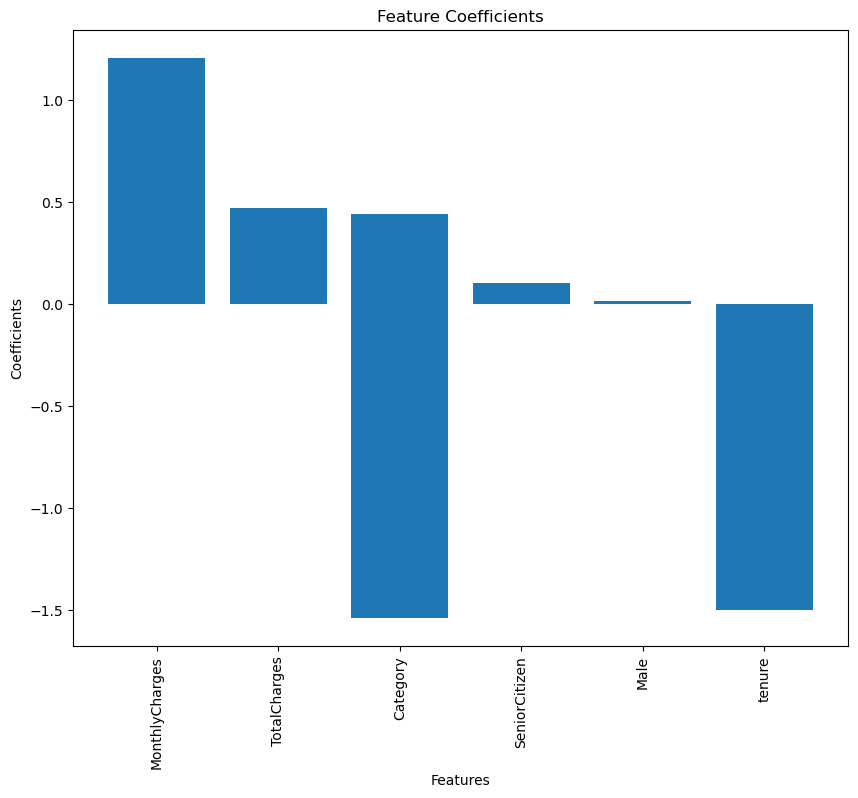

In [59]:
weightsSorted = weights.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.bar(weightsSorted.index, weightsSorted.values)


plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

### Coefficient Obeservations

Monthly Charges and total charges have the most positive relation with customer churn, because we can assume, that given the circumstance, a customer would want to stop working with the certain ISP depending on much they are spending on the service. If the customer feels like the service is becoming too expensive for them to afford or not worth the price, then they will more than likely look else where. However, when it comes to each category regarding the service itself, a customer is least likely to churn for the subscription services specifically. 

Also, the tenure (the amount of time a customer has spent witht he company) will not dictate a customer churning or not. In fact, it only prove how long a customer will stay with the service. If the service is good, then the customer will stay for longer and pay for more things that the company offers.

#### Relation to the Section 2:

This also aligns with my earlier analysis regarding customers leaving or staying with the service. Monthly and total charges makes the most sense out of the reason due to the amount of money a customer is going to spend on a service will be the end-all-be-all of the decision.

# Conclusion: 

In summary, the main findings here that 1/3 of the people who pay around 18-35 dollars will more than likely churn. Also, the contract type will also affect those who churn as most people who do paperless will more than likely assess how much they will pay. Also, given the bar graph for the co-efficients, we can infer that Total Cost and Monthly Cost are the two major factors at play to further hit home that the cost of the service is ultimately causing people to churn.

In contrast, the service also have a very high tenure among its customers as well, so the reliablity and the services that it offers also do well to retain customers over a long period of time. So, in short, the biggest reason that customers will leave the service is the amount of money they have to put in and the total cost. Depending on the circumstance, this can be the end-all-be-all of a customer either staying or leaving.

As far as suggestions are concerned  for customers staying with the companies service. The biggest one is to lower the cost to use said service. Cost is the driver and decider for a customer to buy into a service. It does not have to be a significant price drop, but it has to be enough to be more accessible for customers with either lower income or tighter budgets. Another suggestion is to try and bundle in internet and phone lines. While having no internet barely made an impact on the graph, more customers will stay if people can get home and internet for a good deal at the same time rather than paying for the two seperately. That can lead to customers leaving as well given the amount of money that has to go out the door just to maintain both phone and internet when other companies can do a package deal for much less. The final suggestion is to improve the services a bit. While it may not be a major factor in losing customers, it can still have an impact, and the coffecient bar graph shows this to be a fact. The better the customer has an experience doing something within the categories the longer they will stay with the company. 